In [23]:
import pandas as pd

In [ ]:
all_matches = pd.read_json("results/all_matches_of_Test5.docx.json", orient="records")
all_matches = all_matches.sort_values(by='score', ascending=False)
all_matches = all_matches.drop_duplicates(subset=['title'], keep='first')


In [ ]:
all_matches.to_json("results/all_matches_best_of_Test5.docx.json", orient="records", force_ascii=False, indent=4)

### Let's compare


In [ ]:
semantique= pd.read_json("results/all_matches_best_of_Test5.docx.json", orient="records")

In [ ]:
semantique.drop(columns=[ 'score', 'pts'], inplace=True)

semantique.rename(columns={'question': 'question_semantique', 'sentence': 'sentence_semantique'}, inplace=True)
semantique

In [ ]:
lexicale= pd.read_json("results/after_comparaison_lexicale_of_Test5.docx.json", orient="records")


In [ ]:
lexicale.drop(columns=[ 'score', 'pts','similarity'], inplace=True)
lexicale.rename(columns={'question': 'question_lexicale', 'sentence': 'sentence_lexicale'}, inplace=True)

lexicale

In [ ]:
llm= pd.read_json("results/after_llm_of_Test5.docx.json", orient="records")


In [ ]:
llm.drop(columns=[ 'score', 'pts'], inplace=True)
llm.rename(columns={'question': 'question_llm', 'sentence': 'sentence_llm'}, inplace=True)
llm

In [ ]:
corrected= pd.read_json("results/corrected_of_Test5.docx.json", orient="records")
corrected.drop(columns=[ 'score', 'pts'], inplace=True)
corrected.rename(columns={'question': 'question_corrected', 'sentence': 'sentence_corrected'}, inplace=True)
corrected

In [ ]:
# Merge all four DataFrames on 'title' sequentially
tableGenerale = corrected.merge(llm, on='title') \
						 .merge(semantique, on='title') \
						 .merge(lexicale, on='title')
tableGenerale


### Réponses communes par toutes les méthodes

In [ ]:
mappingRepCommunes={}
for row in tableGenerale.itertuples():
	if (
		row.question_corrected == row.question_llm
		and row.question_corrected == row.question_semantique
		and row.question_corrected == row.question_lexicale
	):
		mappingRepCommunes[row.title] = row.question_corrected
		ReponsesCommunes = getattr(row, 'title')
		print(f"Réponse commune pour la question : {ReponsesCommunes}")
		print(f"--> {row.question_corrected}")
    




In [ ]:
nbreReponsesCommunes = len(mappingRepCommunes)
nbreReponsesCommunes

In [ ]:
tauxReponseCorrect=nbreReponsesCommunes/    len(tableGenerale) * 100

print(f"Taux de réponses communes : {tauxReponseCorrect:.2f}%")

### Réponses correctes par la méthode sémantique

In [ ]:
correctedAndSemantique = corrected.merge(semantique, on='title')

In [ ]:
mappingRepCorrectedSemantique = {}
for row in correctedAndSemantique.itertuples():
    if row.question_corrected == row.question_semantique:
        mappingRepCorrectedSemantique[row.title] = row.question_corrected
        ReponsesCommunes = getattr(row, 'title')
        print(f"Réponse commune pour la question : {ReponsesCommunes}")
        print(f"--> {row.question_corrected}")

In [ ]:
nbreReponsesCorrectedSemantique = len(mappingRepCorrectedSemantique)
nbreReponsesCorrectedSemantique

In [ ]:
tauxReponseCorrectedSemantique = nbreReponsesCorrectedSemantique / len(correctedAndSemantique) * 100
print(f"Taux de réponses correctes par la méthode sémantique : {tauxReponseCorrectedSemantique:.2f}%")

### Réponses correctes par la méthode llm

In [ ]:
correctedAndLlm = corrected.merge(llm, on='title')

In [ ]:
correctedAndLlm

In [ ]:
mappingRepCorrectedLlm = {}
for row in correctedAndLlm.itertuples():
    if row.question_corrected == row.question_llm:
        mappingRepCorrectedLlm[row.title] = row.question_corrected
        ReponsesCommunes = getattr(row, 'title')
        print(f"Réponse commune pour la question : {ReponsesCommunes}")
        print(f"--> {row.question_corrected}")

In [ ]:
nbreReponsesCorrectedLlm = len(mappingRepCorrectedLlm)
nbreReponsesCorrectedLlm

In [ ]:
tauxReponseCorrectedllm = nbreReponsesCorrectedLlm / len(correctedAndSemantique) * 100
print(f"Taux de réponses correctes par la méthode llm : {tauxReponseCorrectedllm:.2f}%")

### Réponses corretes par la méthode lexicale

In [ ]:
correctedAndLexicale = corrected.merge(lexicale, on='title')

In [ ]:
correctedAndLexicale

In [ ]:
mappingRepCorrectesLexicale = {}
for row in correctedAndLexicale.itertuples():
    if row.question_corrected == row.question_lexicale:
        mappingRepCorrectesLexicale[row.title] = row.question_corrected
        ReponsesCommunes = getattr(row, 'title')
        print(f"Réponse commune pour la question : {ReponsesCommunes}")
        print(f"--> {row.question_corrected}")

In [ ]:
nbreReponsesCorrectedLexicale = len(mappingRepCorrectesLexicale)
nbreReponsesCorrectedLexicale

In [ ]:
tauxReponseCorrectedLexicale = nbreReponsesCorrectedLexicale / len(correctedAndSemantique) * 100
print(f"Taux de réponses correctes par la méthode lexicale : {tauxReponseCorrectedLexicale:.2f}%")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Data for the bar chart
labels = ['Communes', 'Sémantique', 'LLM', 'Lexicale']
values = [tauxReponseCorrect, tauxReponseCorrectedSemantique, tauxReponseCorrectedllm, tauxReponseCorrectedLexicale]    
# Create a bar chart
fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=['blue', 'orange', 'green', 'red'])
# Add labels and title
ax.set_ylabel('Taux de réponses correctes (%)')
ax.set_title('Comparaison des taux de réponses correctes par méthode')
# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')
# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Liste des questions
questions = tableGenerale['title'].tolist()

# Données par type de correction
llm_values = [1 if q in mappingRepCorrectedLlm else 0 for q in questions]
semantic_values = [1 if q in mappingRepCorrectedSemantique else 0 for q in questions]
lexical_values = [1 if q in mappingRepCorrectesLexicale else 0 for q in questions]

x = np.arange(len(questions))  # positions des groupes
width = 0.25  # largeur de chaque barre

fig, ax = plt.subplots(figsize=(12, 6))

# Affichage des barres groupées
bars1 = ax.bar(x - width, llm_values, width, label='LLM', color='blue')
bars2 = ax.bar(x, semantic_values, width, label='Sémantique', color='orange')
bars3 = ax.bar(x + width, lexical_values, width, label='Lexicale', color='green')

# Personnalisation
ax.set_ylabel('Réponse correcte (1 = Oui, 0 = Non)')
ax.set_title('Répartition des réponses correctes par méthode et par question')
ax.set_xticks(x)
ax.set_xticklabels(questions, rotation=45, ha='right')
ax.legend()

# Affichage des valeurs au-dessus des barres
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        yval = bar.get_height()
        if yval > 0:
            ax.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval)}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


### Compare for Test6

In [ ]:
all_matches = pd.read_json("results/all_matches_of_Test6.docx.json", orient="records")
all_matches = all_matches.sort_values(by='score', ascending=False)
all_matches = all_matches.drop_duplicates(subset=['title'], keep='first')
all_matches.to_json("results/all_matches_best_of_Test6.docx.json", orient="records", force_ascii=False, indent=4)

In [ ]:
semantique= pd.read_json("results/all_matches_best_of_Test6.docx.json", orient="records")
semantique.drop(columns=[ 'score', 'pts'], inplace=True)

semantique.rename(columns={'question': 'question_semantique', 'sentence': 'sentence_semantique'}, inplace=True)
semantique

In [ ]:
lexicale= pd.read_json("results/after_comparaison_lexicale_of_Test6.docx.json", orient="records")
lexicale.drop(columns=[ 'score', 'pts','similarity'], inplace=True)
lexicale.rename(columns={'question': 'question_lexicale', 'sentence': 'sentence_lexicale'}, inplace=True)

lexicale

In [ ]:
llm= pd.read_json("results/after_llm_of_Test6.docx.json", orient="records")
llm.drop(columns=[ 'score', 'pts'], inplace=True)
llm.rename(columns={'question': 'question_llm', 'sentence': 'sentence_llm'}, inplace=True)
llm

In [ ]:
corrected= pd.read_json("results/corrected_of_Test6.docx.json", orient="records")

corrected.rename(columns={'question': 'question_corrected', 'sentence': 'sentence_corrected'}, inplace=True)
corrected

In [ ]:
# Merge all four DataFrames on 'title' sequentially
tableGenerale = corrected.merge(llm, on='title') \
						 .merge(semantique, on='title') \
						 .merge(lexicale, on='title')
tableGenerale


In [ ]:
mappingRepCommunes={}
for row in tableGenerale.itertuples():
	if (
		row.question_corrected == row.question_llm
		and row.question_corrected == row.question_semantique
		and row.question_corrected == row.question_lexicale
	):
		mappingRepCommunes[row.title] = row.question_corrected
		ReponsesCommunes = getattr(row, 'title')
		print(f"Réponse commune pour la question : {ReponsesCommunes}")
		print(f"--> {row.question_corrected}")
    




In [ ]:
nbreReponsesCommunes = len(mappingRepCommunes)
nbreReponsesCommunes

In [ ]:
tauxReponseCorrect=nbreReponsesCommunes/    len(tableGenerale) * 100

print(f"Taux de réponses communes : {tauxReponseCorrect:.2f}%")

In [ ]:
correctedAndSemantique = corrected.merge(semantique, on='title')

In [ ]:
mappingRepCorrectedSemantique = {}
for row in correctedAndSemantique.itertuples():
    if row.question_corrected == row.question_semantique:
        mappingRepCorrectedSemantique[row.title] = row.question_corrected
        ReponsesCommunes = getattr(row, 'title')
        print(f"Réponse commune pour la question : {ReponsesCommunes}")
        print(f"--> {row.question_corrected}")

In [ ]:
nbreReponsesCorrectedSemantique = len(mappingRepCorrectedSemantique)
nbreReponsesCorrectedSemantique

In [ ]:
tauxReponseCorrectedSemantique = nbreReponsesCorrectedSemantique / len(correctedAndSemantique) * 100
print(f"Taux de réponses correctes par la méthode sémantique : {tauxReponseCorrectedSemantique:.2f}%")

In [ ]:
correctedAndLlm = corrected.merge(llm, on='title')

In [ ]:
correctedAndLlm

In [ ]:
mappingRepCorrectedLlm = {}
for row in correctedAndLlm.itertuples():
    if row.question_corrected == row.question_llm:
        mappingRepCorrectedLlm[row.title] = row.question_corrected
        ReponsesCommunes = getattr(row, 'title')
        print(f"Réponse commune pour la question : {ReponsesCommunes}")
        print(f"--> {row.question_corrected}")

In [ ]:
nbreReponsesCorrectedLlm = len(mappingRepCorrectedLlm)
tauxReponseCorrectedllm = nbreReponsesCorrectedLlm / len(correctedAndSemantique) * 100
print(f"Taux de réponses correctes par la méthode llm : {tauxReponseCorrectedllm:.2f}%")

In [ ]:
correctedAndLexicale = corrected.merge(lexicale, on='title')
mappingRepCorrectesLexicale = {}
for row in correctedAndLexicale.itertuples():
    if row.question_corrected == row.question_lexicale:
        mappingRepCorrectesLexicale[row.title] = row.question_corrected
        ReponsesCommunes = getattr(row, 'title')
        print(f"Réponse commune pour la question : {ReponsesCommunes}")
        print(f"--> {row.question_corrected}")

In [ ]:
nbreReponsesCorrectedLexicale= len(mappingRepCorrectedLlm)
tauxReponseCorrectedlexicale = nbreReponsesCorrectedLexicale / len(correctedAndSemantique) * 100
print(f"Taux de réponses correctes par la méthode lexicale : {tauxReponseCorrectedlexicale:.2f}%")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Data for the bar chart
labels = ['Communes', 'Sémantique', 'LLM', 'Lexicale']
values = [tauxReponseCorrect, tauxReponseCorrectedSemantique, tauxReponseCorrectedllm, tauxReponseCorrectedlexicale]    
# Create a bar chart
fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=['blue', 'orange', 'green', 'red'])
# Add labels and title
ax.set_ylabel('Taux de réponses correctes (%)')
ax.set_title('Comparaison des taux de réponses correctes par méthode')
# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')
# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Liste des questions
questions = tableGenerale['title'].tolist()

# Données par type de correction
llm_values = [1 if q in mappingRepCorrectedLlm else 0 for q in questions]
semantic_values = [1 if q in mappingRepCorrectedSemantique else 0 for q in questions]
lexical_values = [1 if q in mappingRepCorrectesLexicale else 0 for q in questions]

x = np.arange(len(questions))  # positions des groupes
width = 0.25  # largeur de chaque barre

fig, ax = plt.subplots(figsize=(12, 6))

# Affichage des barres groupées
bars1 = ax.bar(x - width, llm_values, width, label='LLM', color='blue')
bars2 = ax.bar(x, semantic_values, width, label='Sémantique', color='orange')
bars3 = ax.bar(x + width, lexical_values, width, label='Lexicale', color='green')

# Personnalisation
ax.set_ylabel('Réponse correcte (1 = Oui, 0 = Non)')
ax.set_title('Répartition des réponses correctes par méthode et par question')
ax.set_xticks(x)
ax.set_xticklabels(questions, rotation=45, ha='right')
ax.legend()

# Affichage des valeurs au-dessus des barres
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        yval = bar.get_height()
        if yval > 0:
            ax.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval)}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


### CC de AE

In [25]:
all_matches = pd.read_json("results/all_matches_of_Cahier des charges_nouveau poste 2025_V0.6_définitive.pdf.json", orient="records")
all_matches = all_matches.sort_values(by='score', ascending=False)
all_matches = all_matches.drop_duplicates(subset=['title'], keep='first')


In [26]:
all_matches.to_json("results/all_matches_best_of_Cahier des charges_nouveau poste 2025_V0.6_définitive.pdf.json", orient="records", force_ascii=False, indent=4)

In [27]:
semantique= pd.read_json("results/all_matches_best_of_Cahier des charges_nouveau poste 2025_V0.6_définitive.pdf.json", orient="records")
semantique.drop(columns=[ 'score', 'pts'], inplace=True)

semantique.rename(columns={'question': 'question_semantique', 'sentence': 'sentence_semantique'}, inplace=True)
semantique

,title,question_semantique,sentence_semantique
0,Connaissances linguistiques,La fonction requiert des connaissances linguis...,Parfaite maîtrise de la langue française et ca...
1,Durée,Une durée minimum de 1 à 3 ans d'expérience pr...,Minimum 3 à 5 ans de pratique professionnelle ...
2,Diversité et quantité des postes à gérer,La fonction n'a pas de postes directement subo...,Postes hiérarchiquement subordonnés
3,Nature,La fonction requiert de l'expérience professio...,Minimum 3 à 5 ans de pratique professionnelle ...
4,Formation de base,La fonction requiert un Bachelor (Université o...,Formation supérieure de niveau Bachelor ou Mas...
5,Responsabilités de planification et de réalisa...,La fonction préavise des plans à long terme. E...,l’évolution des métiers et des besoins et prop...
6,Rôle dans la gestion des ressources humaines,"Elle a un rôle de direction, d'organisation et...",Sens des responsabilités et autonomie dans la ...
7,Formation complémentaire,"Deux formations complémentaires, ou plus, sont...",Minimum 3 à 5 ans de pratique professionnelle ...
8,Nature des communications externes,Les communications portent essentiellement sur...,Excellentes capacités de vulgarisation et de t...
9,Innovation,L'exercice de la fonction requiert des compéte...,l’évolution des métiers et des besoins et prop...


In [28]:
lexicale= pd.read_json("results/after_comparaison_lexicale_of_Cahier des charges_nouveau poste 2025_V0.6_définitive.pdf.json", orient="records")

lexicale.drop(columns=[ 'score', 'pts','similarity'], inplace=True)
lexicale.rename(columns={'question': 'question_lexicale', 'sentence': 'sentence_lexicale'}, inplace=True)

lexicale

,title,question_lexicale,sentence_lexicale
0,Formation de base,La fonction requiert un Bachelor (Université o...,Formation supérieure de niveau Bachelor ou Mas...
1,Nature des communications internes,Les communications impliquent des échanges d'i...,Compétences de communication avérées et aisanc...
2,Evolution de l'environnement,La fonction s'exerce dans un environnement à é...,l’évolution des métiers et des besoins et prop...
3,Nature des communications externes,Les communications impliquent des négociations...,Aptitude à la négociation
4,Durée,Une durée minimum de 1 à 3 ans d'expérience pr...,Minimum 3 à 5 ans de pratique professionnelle ...
5,Responsabilités de planification et de réalisa...,La fonction est responsable de l'élaboration e...,participer à la définition et à la mise en œuv...
6,Nature,La fonction requiert de l'expérience professio...,Minimum 3 à 5 ans de pratique professionnelle ...
7,Formation complémentaire,"Deux formations complémentaires, ou plus, sont...",Minimum 3 à 5 ans de pratique professionnelle ...
8,Responsabilités de planification et de réalisa...,La fonction est responsable de l'élaboration e...,piloter et accompagner la mise en œuvre de pro...
9,Rôle dans la gestion des ressources humaines,"Elle a un rôle de direction, d'organisation et...",piloter et accompagner la mise en œuvre de pro...


In [29]:
llm= pd.read_json("results/after_llm_of_Cahier des charges_nouveau poste 2025_V0.6_définitive.pdf.json", orient="records")
llm.drop(columns=[ 'score', 'pts'], inplace=True)
llm.rename(columns={'question': 'question_llm', 'sentence': 'sentence_llm'}, inplace=True)
llm

,title,question_llm,sentence_llm
0,Analyse et synthèse,La fonction requiert la faculté d'analyser des...,Pensée analytique et conceptuelle
1,Autonomie de décision,"La fonction approuve, pour l'/les institution/...",participer à la définition et à la mise en œuv...
2,Complexité de l'environnement,La fonction fait fréquemment face à un degré i...,l’évolution des métiers et des besoins et prop...
3,Connaissances linguistiques,La fonction requiert des connaissances linguis...,Parfaite maîtrise de la langue française et ca...
4,Diversité des missions,L'ensemble des tâches principales qui incomben...,Assurer la fonction de « project office » pour...
5,Diversité et quantité des postes à gérer,La fonction gère directement un grand nombre d...,En qualité de « Chargé-e de projets RH »
6,Durée,Une durée minimum de 1 à 3 ans d'expérience pr...,En qualité de « Responsable de la formation co...
7,Evolution de l'environnement,La fonction s'exerce dans un environnement à é...,Compétences avérées en gestion du changement (...
8,Formation complémentaire,Une formation complémentaire est nécessaire po...,En qualité de « Responsable de la formation co...
9,Formation de base,La fonction requiert un Bachelor (Université o...,Formation supérieure de niveau Bachelor ou Mas...


In [30]:
corrected = pd.read_excel("EvalStarling/RadGridExport.xlsx")

corrected.drop(index=0, inplace=True)
corrected

,Nombre de cas: 25/25,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
1,1PJ81032,200,A,1,1,5,5,0,2025-07-08 15:41:19,admin2.admin2@spark-hr.ch,Formation de base,La fonction requiert un Bachelor (Université o...,1,8
2,1PJ81032,200,A,1,2,2,2,0,2025-07-08 15:41:19,admin2.admin2@spark-hr.ch,Formation complémentaire,Une formation complémentaire est nécessaire po...,1,3
3,1PJ81032,200,A,2,1,3,3,0,2025-07-08 15:41:19,admin2.admin2@spark-hr.ch,Nature,La fonction requiert d'avoir déjà eu le même t...,1,4
4,1PJ81032,200,A,2,2,2,2,0,2025-07-08 15:41:19,admin2.admin2@spark-hr.ch,Durée,Une durée minimum de 1 à 3 ans d'expérience pr...,1,4
5,1PJ81032,200,B,1,1,2,2,0,2025-07-08 15:41:19,admin2.admin2@spark-hr.ch,Responsabilités de planification et de réalisa...,La fonction participe à l'élaboration et/ou à ...,1,5
6,1PJ81032,200,B,1,2,2,2,0,2025-07-08 15:41:19,admin2.admin2@spark-hr.ch,Responsabilités de planification et de réalisa...,La fonction contribue de manière active à l'él...,1,5
7,1PJ81032,200,B,2,1,3,3,0,2025-07-08 15:41:19,admin2.admin2@spark-hr.ch,Autonomie de décision,La fonction agit de manière autonome dans le c...,1,5
8,1PJ81032,200,B,3,1,1,1,0,2025-07-08 15:41:19,admin2.admin2@spark-hr.ch,Diversité et quantité des postes à gérer,La fonction n'a pas de postes directement subo...,1,5
9,1PJ81032,200,B,3,2,2,2,0,2025-07-08 15:41:19,admin2.admin2@spark-hr.ch,Rôle dans la gestion des ressources humaines,Elle a un rôle d'animation incluant le transfe...,1,4
10,1PJ81032,200,B,4,1,1,1,0,2025-07-08 15:41:19,admin2.admin2@spark-hr.ch,Responsabilités budgétaires,La fonction n'est pas impliquée dans l'élabora...,1,6


In [31]:
corrected = pd.read_excel("EvalStarling/RadGridExport.xlsx")

corrected.drop(index=0, inplace=True)
corrected.rename(columns={'Unnamed: 10': 'title', 'Unnamed: 11': 'question_corrected'}, inplace=True)
corrected=corrected[["title", "question_corrected"]]


In [32]:
with open("results/corrected_of_Cahier des charges_nouveau poste 2025_V0.6_définitive.pdf.json", "w", encoding="utf-8") as f:
    corrected.to_json(f, orient="records", force_ascii=False, indent=4)

In [33]:
corrected= pd.read_json("results/corrected_of_Cahier des charges_nouveau poste 2025_V0.6_définitive.pdf.json", orient="records")
corrected

,title,question_corrected
0,Formation de base,La fonction requiert un Bachelor (Université o...
1,Formation complémentaire,Une formation complémentaire est nécessaire po...
2,Nature,La fonction requiert d'avoir déjà eu le même t...
3,Durée,Une durée minimum de 1 à 3 ans d'expérience pr...
4,Responsabilités de planification et de réalisa...,La fonction participe à l'élaboration et/ou à ...
5,Responsabilités de planification et de réalisa...,La fonction contribue de manière active à l'él...
6,Autonomie de décision,La fonction agit de manière autonome dans le c...
7,Diversité et quantité des postes à gérer,La fonction n'a pas de postes directement subo...
8,Rôle dans la gestion des ressources humaines,Elle a un rôle d'animation incluant le transfe...
9,Responsabilités budgétaires,La fonction n'est pas impliquée dans l'élabora...


In [34]:
tableGenerale = corrected.merge(llm, on='title') \
						 .merge(semantique, on='title') \
						 .merge(lexicale, on='title')
tableGenerale


,title,question_corrected,question_llm,sentence_llm,question_semantique,sentence_semantique,question_lexicale,sentence_lexicale
0,Formation de base,La fonction requiert un Bachelor (Université o...,La fonction requiert un Bachelor (Université o...,Formation supérieure de niveau Bachelor ou Mas...,La fonction requiert un Bachelor (Université o...,Formation supérieure de niveau Bachelor ou Mas...,La fonction requiert un Bachelor (Université o...,Formation supérieure de niveau Bachelor ou Mas...
1,Formation complémentaire,Une formation complémentaire est nécessaire po...,Une formation complémentaire est nécessaire po...,En qualité de « Responsable de la formation co...,"Deux formations complémentaires, ou plus, sont...",Minimum 3 à 5 ans de pratique professionnelle ...,"Deux formations complémentaires, ou plus, sont...",Minimum 3 à 5 ans de pratique professionnelle ...
2,Nature,La fonction requiert d'avoir déjà eu le même t...,La fonction requiert de l'expérience professio...,responsable de la formation des apprenant-e-s,La fonction requiert de l'expérience professio...,Minimum 3 à 5 ans de pratique professionnelle ...,La fonction requiert de l'expérience professio...,Minimum 3 à 5 ans de pratique professionnelle ...
3,Durée,Une durée minimum de 1 à 3 ans d'expérience pr...,Une durée minimum de 1 à 3 ans d'expérience pr...,En qualité de « Responsable de la formation co...,Une durée minimum de 1 à 3 ans d'expérience pr...,Minimum 3 à 5 ans de pratique professionnelle ...,Une durée minimum de 1 à 3 ans d'expérience pr...,Minimum 3 à 5 ans de pratique professionnelle ...
4,Responsabilités de planification et de réalisa...,La fonction participe à l'élaboration et/ou à ...,La fonction est responsable de l'élaboration e...,Sens aigu des priorités et de la gestion des r...,La fonction est responsable de l'élaboration e...,monitoring et la priorisation de tous les proj...,La fonction est responsable de l'élaboration e...,piloter et accompagner la mise en œuvre de pro...
5,Responsabilités de planification et de réalisa...,La fonction contribue de manière active à l'él...,La fonction est responsable de l'élaboration e...,piloter et accompagner la mise en œuvre de pro...,La fonction préavise des plans à long terme. E...,l’évolution des métiers et des besoins et prop...,La fonction est responsable de l'élaboration e...,participer à la définition et à la mise en œuv...
6,Autonomie de décision,La fonction agit de manière autonome dans le c...,"La fonction approuve, pour l'/les institution/...",participer à la définition et à la mise en œuv...,La fonction agit de manière autonome dans le c...,l’évolution des métiers et des besoins et prop...,"La fonction approuve, pour l'/les institution/...",participer à la définition et à la mise en œuv...
7,Diversité et quantité des postes à gérer,La fonction n'a pas de postes directement subo...,La fonction gère directement un grand nombre d...,En qualité de « Chargé-e de projets RH »,La fonction n'a pas de postes directement subo...,Postes hiérarchiquement subordonnés,La fonction gère directement un grand nombre d...,l’adjoint-e du-de la chef-fe de service et les...
8,Rôle dans la gestion des ressources humaines,Elle a un rôle d'animation incluant le transfe...,"Elle a un rôle de direction, d'organisation et...",Chargé-e de projets RH et responsable de la fo...,"Elle a un rôle de direction, d'organisation et...",Sens des responsabilités et autonomie dans la ...,"Elle a un rôle de direction, d'organisation et...",piloter et accompagner la mise en œuvre de pro...
9,Responsabilités budgétaires,La fonction n'est pas impliquée dans l'élabora...,La fonction participe à l'élaboration et assur...,Suivre l’évolution du budget de formation en c...,La fonction participe à l'élaboration et assur...,Suivre l’évolution du budget de formation en c...,La fonction participe à l'élaboration et assur...,monitoring et la priorisation de tous les proj...


In [35]:
mappingRepCommunes={}
for row in tableGenerale.itertuples():
	if (
		row.question_corrected == row.question_llm
		and row.question_corrected == row.question_semantique
		and row.question_corrected == row.question_lexicale
	):
		mappingRepCommunes[row.title] = row.question_corrected
		ReponsesCommunes = getattr(row, 'title')
		print(f"Réponse commune pour la question : {ReponsesCommunes}")
		print(f"--> {row.question_corrected}")
    


Réponse commune pour la question : Formation de base
--> La fonction requiert un Bachelor (Université ou HES) ou équivalent.
Réponse commune pour la question : Durée
--> Une durée minimum de 1 à 3 ans d'expérience professionnelle est nécessaire à l'exercice de la fonction.
Réponse commune pour la question : Connaissances linguistiques
--> La fonction requiert des connaissances linguistiques approfondies (lecture, conversation et rédaction) en français.


In [36]:
nbreReponsesCommunes = len(mappingRepCommunes)
tauxReponseCorrect=nbreReponsesCommunes/    len(tableGenerale) * 100

print(f"Taux de réponses communes : {tauxReponseCorrect:.2f}%")

Taux de réponses communes : 15.00%


### Réponses correctes par la méthode sémantique

In [37]:
correctedAndSemantique = corrected.merge(semantique, on='title')

In [38]:
mappingRepCorrectedSemantique = {}
for row in correctedAndSemantique.itertuples():
    if row.question_corrected == row.question_semantique:
        mappingRepCorrectedSemantique[row.title] = row.question_corrected
        ReponsesCommunes = getattr(row, 'title')
        print(f"Réponse commune pour la question : {ReponsesCommunes}")
        print(f"--> {row.question_corrected}")

Réponse commune pour la question : Formation de base
--> La fonction requiert un Bachelor (Université ou HES) ou équivalent.
Réponse commune pour la question : Durée
--> Une durée minimum de 1 à 3 ans d'expérience professionnelle est nécessaire à l'exercice de la fonction.
Réponse commune pour la question : Autonomie de décision
--> La fonction agit de manière autonome dans le cadre de directives établies. Elle peut prendre des initiatives pour l'amélioration des prestations, dans le cadre de limites définies (budget, crédits, délais, etc.), qu'elle peut faire adapter si la situation l'exige.
Réponse commune pour la question : Diversité et quantité des postes à gérer
--> La fonction n'a pas de postes directement subordonnés.
Réponse commune pour la question : Connaissances linguistiques
--> La fonction requiert des connaissances linguistiques approfondies (lecture, conversation et rédaction) en français.
Réponse commune pour la question : Evolution de l'environnement
--> La fonction s'

In [39]:
nbreReponsesCorrectedSemantique = len(mappingRepCorrectedSemantique)
tauxReponseCorrectedSemantique = nbreReponsesCorrectedSemantique / len(correctedAndSemantique) * 100
print(f"Taux de réponses correctes par la méthode sémantique : {tauxReponseCorrectedSemantique:.2f}%")

Taux de réponses correctes par la méthode sémantique : 30.00%


### Réponses correctes par la méthode llm

In [40]:
correctedAndLlm = corrected.merge(llm, on='title')
correctedAndLlm

,title,question_corrected,question_llm,sentence_llm
0,Formation de base,La fonction requiert un Bachelor (Université o...,La fonction requiert un Bachelor (Université o...,Formation supérieure de niveau Bachelor ou Mas...
1,Formation complémentaire,Une formation complémentaire est nécessaire po...,Une formation complémentaire est nécessaire po...,En qualité de « Responsable de la formation co...
2,Nature,La fonction requiert d'avoir déjà eu le même t...,La fonction requiert de l'expérience professio...,responsable de la formation des apprenant-e-s
3,Durée,Une durée minimum de 1 à 3 ans d'expérience pr...,Une durée minimum de 1 à 3 ans d'expérience pr...,En qualité de « Responsable de la formation co...
4,Responsabilités de planification et de réalisa...,La fonction participe à l'élaboration et/ou à ...,La fonction est responsable de l'élaboration e...,Sens aigu des priorités et de la gestion des r...
5,Responsabilités de planification et de réalisa...,La fonction contribue de manière active à l'él...,La fonction est responsable de l'élaboration e...,piloter et accompagner la mise en œuvre de pro...
6,Autonomie de décision,La fonction agit de manière autonome dans le c...,"La fonction approuve, pour l'/les institution/...",participer à la définition et à la mise en œuv...
7,Diversité et quantité des postes à gérer,La fonction n'a pas de postes directement subo...,La fonction gère directement un grand nombre d...,En qualité de « Chargé-e de projets RH »
8,Rôle dans la gestion des ressources humaines,Elle a un rôle d'animation incluant le transfe...,"Elle a un rôle de direction, d'organisation et...",Chargé-e de projets RH et responsable de la fo...
9,Responsabilités budgétaires,La fonction n'est pas impliquée dans l'élabora...,La fonction participe à l'élaboration et assur...,Suivre l’évolution du budget de formation en c...


In [41]:
mappingRepCorrectedLlm = {}
for row in correctedAndLlm.itertuples():
    if row.question_corrected == row.question_llm:
        mappingRepCorrectedLlm[row.title] = row.question_corrected
        ReponsesCommunes = getattr(row, 'title')
        print(f"Réponse commune pour la question : {ReponsesCommunes}")
        print(f"--> {row.question_corrected}")

Réponse commune pour la question : Formation de base
--> La fonction requiert un Bachelor (Université ou HES) ou équivalent.
Réponse commune pour la question : Formation complémentaire
--> Une formation complémentaire est nécessaire pour l'exercice de la fonction.
Réponse commune pour la question : Durée
--> Une durée minimum de 1 à 3 ans d'expérience professionnelle est nécessaire à l'exercice de la fonction.
Réponse commune pour la question : Connaissances linguistiques
--> La fonction requiert des connaissances linguistiques approfondies (lecture, conversation et rédaction) en français.


In [42]:
nbreReponsesCorrectedLlm = len(mappingRepCorrectedLlm)
nbreReponsesCorrectedLlm

4

In [43]:
tauxReponseCorrectedllm = nbreReponsesCorrectedLlm / len(correctedAndSemantique) * 100
print(f"Taux de réponses correctes par la méthode llm : {tauxReponseCorrectedllm:.2f}%")

Taux de réponses correctes par la méthode llm : 20.00%


In [44]:
correctedAndLexicale = corrected.merge(lexicale, on='title')
correctedAndLexicale

,title,question_corrected,question_lexicale,sentence_lexicale
0,Formation de base,La fonction requiert un Bachelor (Université o...,La fonction requiert un Bachelor (Université o...,Formation supérieure de niveau Bachelor ou Mas...
1,Formation complémentaire,Une formation complémentaire est nécessaire po...,"Deux formations complémentaires, ou plus, sont...",Minimum 3 à 5 ans de pratique professionnelle ...
2,Nature,La fonction requiert d'avoir déjà eu le même t...,La fonction requiert de l'expérience professio...,Minimum 3 à 5 ans de pratique professionnelle ...
3,Durée,Une durée minimum de 1 à 3 ans d'expérience pr...,Une durée minimum de 1 à 3 ans d'expérience pr...,Minimum 3 à 5 ans de pratique professionnelle ...
4,Responsabilités de planification et de réalisa...,La fonction participe à l'élaboration et/ou à ...,La fonction est responsable de l'élaboration e...,piloter et accompagner la mise en œuvre de pro...
5,Responsabilités de planification et de réalisa...,La fonction contribue de manière active à l'él...,La fonction est responsable de l'élaboration e...,participer à la définition et à la mise en œuv...
6,Autonomie de décision,La fonction agit de manière autonome dans le c...,"La fonction approuve, pour l'/les institution/...",participer à la définition et à la mise en œuv...
7,Diversité et quantité des postes à gérer,La fonction n'a pas de postes directement subo...,La fonction gère directement un grand nombre d...,l’adjoint-e du-de la chef-fe de service et les...
8,Rôle dans la gestion des ressources humaines,Elle a un rôle d'animation incluant le transfe...,"Elle a un rôle de direction, d'organisation et...",piloter et accompagner la mise en œuvre de pro...
9,Responsabilités budgétaires,La fonction n'est pas impliquée dans l'élabora...,La fonction participe à l'élaboration et assur...,monitoring et la priorisation de tous les proj...


In [45]:
mappingRepCorrectesLexicale = {}
for row in correctedAndLexicale.itertuples():
    if row.question_corrected == row.question_lexicale:
        mappingRepCorrectesLexicale[row.title] = row.question_corrected
        ReponsesCommunes = getattr(row, 'title')
        print(f"Réponse commune pour la question : {ReponsesCommunes}")
        print(f"--> {row.question_corrected}")

Réponse commune pour la question : Formation de base
--> La fonction requiert un Bachelor (Université ou HES) ou équivalent.
Réponse commune pour la question : Durée
--> Une durée minimum de 1 à 3 ans d'expérience professionnelle est nécessaire à l'exercice de la fonction.
Réponse commune pour la question : Connaissances linguistiques
--> La fonction requiert des connaissances linguistiques approfondies (lecture, conversation et rédaction) en français.
Réponse commune pour la question : Evolution de l'environnement
--> La fonction s'exerce dans un environnement à évolution régulière qui nécessite une adaptation aux processus de travail et aux prestations fournies.


In [46]:
nbreReponsesCorrectedLexicale = len(mappingRepCorrectesLexicale)
nbreReponsesCorrectedLexicale

4

In [47]:
tauxReponseCorrectedLexicale = nbreReponsesCorrectedLexicale / len(correctedAndSemantique) * 100
print(f"Taux de réponses correctes par la méthode lexicale : {tauxReponseCorrectedLexicale:.2f}%")

Taux de réponses correctes par la méthode lexicale : 20.00%


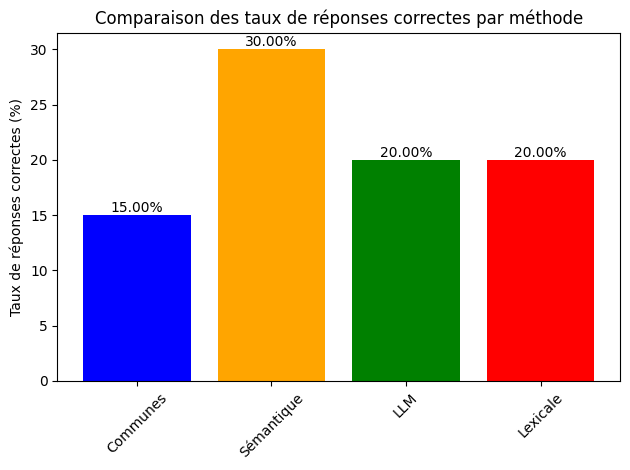

In [48]:
import matplotlib.pyplot as plt
import numpy as np
# Data for the bar chart
labels = ['Communes', 'Sémantique', 'LLM', 'Lexicale']
values = [tauxReponseCorrect, tauxReponseCorrectedSemantique, tauxReponseCorrectedllm, tauxReponseCorrectedLexicale]    
# Create a bar chart
fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=['blue', 'orange', 'green', 'red'])
# Add labels and title
ax.set_ylabel('Taux de réponses correctes (%)')
ax.set_title('Comparaison des taux de réponses correctes par méthode')
# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')
# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

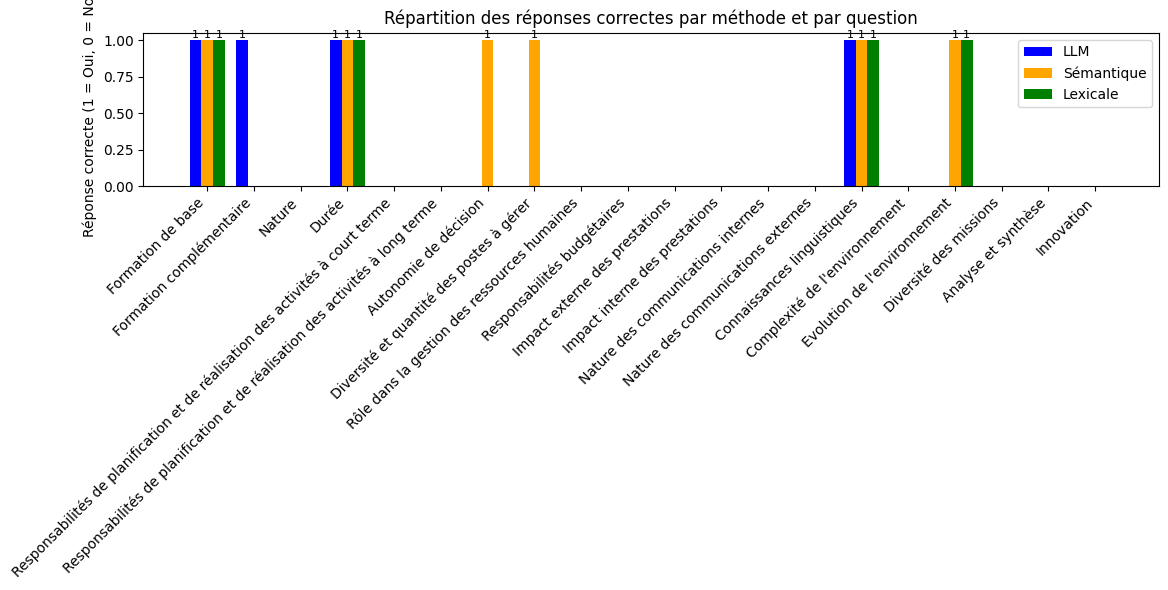

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Liste des questions
questions = tableGenerale['title'].tolist()

# Données par type de correction
llm_values = [1 if q in mappingRepCorrectedLlm else 0 for q in questions]
semantic_values = [1 if q in mappingRepCorrectedSemantique else 0 for q in questions]
lexical_values = [1 if q in mappingRepCorrectesLexicale else 0 for q in questions]

x = np.arange(len(questions))  # positions des groupes
width = 0.25  # largeur de chaque barre

fig, ax = plt.subplots(figsize=(12, 6))

# Affichage des barres groupées
bars1 = ax.bar(x - width, llm_values, width, label='LLM', color='blue')
bars2 = ax.bar(x, semantic_values, width, label='Sémantique', color='orange')
bars3 = ax.bar(x + width, lexical_values, width, label='Lexicale', color='green')

# Personnalisation
ax.set_ylabel('Réponse correcte (1 = Oui, 0 = Non)')
ax.set_title('Répartition des réponses correctes par méthode et par question')
ax.set_xticks(x)
ax.set_xticklabels(questions, rotation=45, ha='right')
ax.legend()

# Affichage des valeurs au-dessus des barres
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        yval = bar.get_height()
        if yval > 0:
            ax.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval)}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


### Compare using codes
